# K-means

## Librerías

In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

## Leyendo datos

In [2]:
iris = datasets.load_iris()

## Procesamiento de datos

Creamos nuestros dataframes con los que vamos a trabajar

In [3]:
X_iris = iris.data
Y_iris = iris.target

In [4]:
x = pd.DataFrame(X_iris, columns=iris.feature_names)
x.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y = pd.DataFrame(Y_iris, columns=['Target'])
y.head(10)

,Target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Creamos de manera sencilla una visualización antes de aplicar el modelo

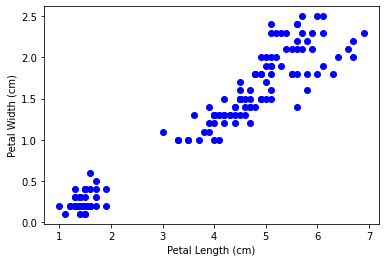

In [6]:
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], color='blue')
plt.xlabel('Petal Length (cm)', fontsize=10)
plt.ylabel('Petal Width (cm)', fontsize=10)
plt.show()

## Creando el modelo

In [16]:
def kmeanModel(k: int):
    model = KMeans(n_clusters=k, max_iter=1000)
    model.fit(x)
    y_labels = model.labels_
    centroids = model.cluster_centers_
    return model.predict(x), centroids


In [18]:
y_kmeans = kmeanModel(k=2)[0]
print('Predicciones:', y_kmeans)

Predicciones: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Cada uno de estos valores (0 y 1) corresponde a los dos grupos.

Ahora, al calcular la precisión (accuracy), vemos que no es muy bueno este modelo con K=2.

In [19]:
from sklearn import metrics

accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
print('Accuracy:', accuracy)

Accuracy: 0.5399218294207123


## Mejorando el modelo con el método del codo

In [20]:
distortions = []
K = range(1,10)

for k in K:
    model = KMeans(n_clusters=k, max_iter=1000)
    model.fit(x)
    distortions.append(model.inertia_)

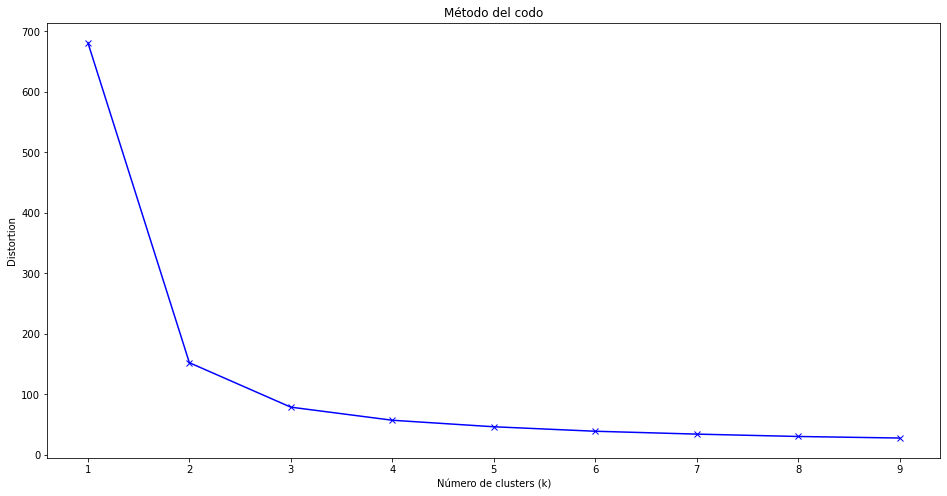

In [21]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distortion')
plt.title('Método del codo')
plt.show()

Del método del codo podemos observar que el valor óptimo para el número de clusters es 3. Repetimos el modelo con ```n_clusters=3 ```

In [24]:
y_kmeans = kmeanModel(k=3)
accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans[0])
print('Accuracy:', accuracy)

Accuracy: 0.7302382722834697


Ahora, hemos mejorado la precisión a un 73 %

## Graficación del modelo

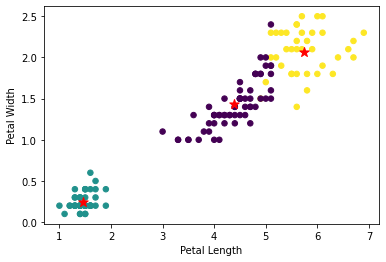

In [56]:
x_centroid = list(y_kmeans[1][:, 2])
y_centroid = list(y_kmeans[1][:, 3])

plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=y_kmeans[0], s=30)
plt.scatter(x_centroid, y_centroid, color='red', s=100, marker='*')
plt.xlabel('Petal Length', fontsize=10)
plt.ylabel('Petal Width', fontsize=10)
plt.show()